In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)

In [3]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [4]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [5]:
x_train=x_train/255
x_test=x_test/255
print("shape of Training:",x_train.shape)
print("shape of Training:",x_test.shape)

shape of Training: (60000, 28, 28, 1)
shape of Training: (10000, 28, 28, 1)


In [6]:
model =Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense (200, activation = "relu"))
model.add(Dropout (0.3))
model.add(Dense(10, activation=  "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']), model.fit(x_train, y_train, epochs= 2)

Epoch 1/2
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0639 - accuracy: 0.9801
Epoch 2/2
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0465 - accuracy: 0.9857


(None, <keras.src.callbacks.History at 0x22d0201f400>)

In [8]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)



313/313 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9831
Loss=0.055
Accuracy=0.983


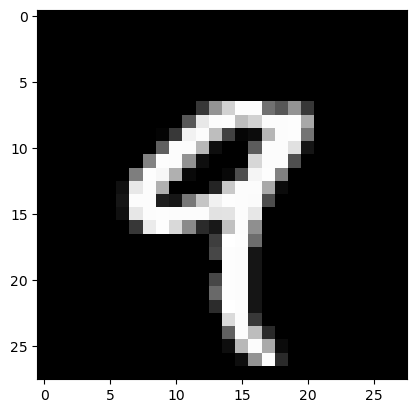

In [9]:
image = x_train[4]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [10]:
image=image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Pedicted class: {}".format(np.argmax (predict_model)))

1/1 [==============================] - 0s 145ms/step
Pedicted class: 9
